In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from matplotlib.cm import rainbow
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['heart.csv']))# Dataset is now stored in a Pandas Dataframe
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Print the target variable count**

Text(0.5, 1.0, 'Count of each Target Class')

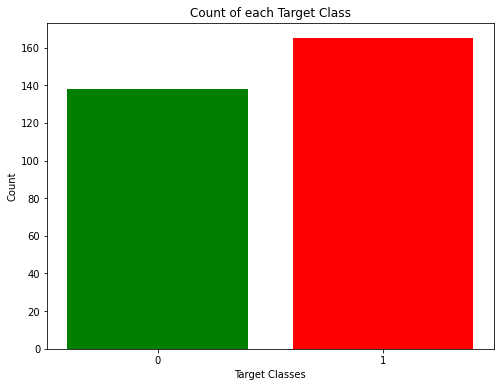

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1]) 
plt.xlabel('Target Classes') 
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

**ML Part**

Train Test split

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
X_train.shape

(203, 30)

In [ ]:
X_test.shape

(100, 30)

In [ ]:
y_train.shape

(203,)

In [ ]:
y_test.shape

(100,)

V MODEL FITTING

In [ ]:
from sklearn.metrics import accuracy_score

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)


In [ ]:
Y_pred_lr.shape

(100,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.0 %


**KNN**

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

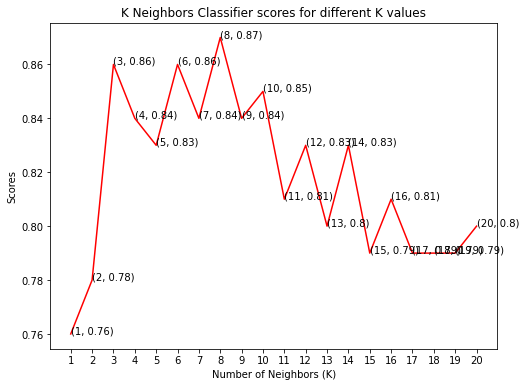

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier  
knn_scores = [] 
for k in range(1,21): 
  knn_classifier = KNeighborsClassifier(n_neighbors = k) 
  knn_classifier.fit(X_train, y_train) 
  knn_scores.append(knn_classifier.score(X_test, y_test))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red') 
for i in range(1,21): 
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1])) 
plt.xticks([i for i in range(1, 21)]) 
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_score = knn_scores[7]*100
print("The score for K Neighbors Classifier is {}% with {} neighbors. ".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 neighbors. 


**SVM**

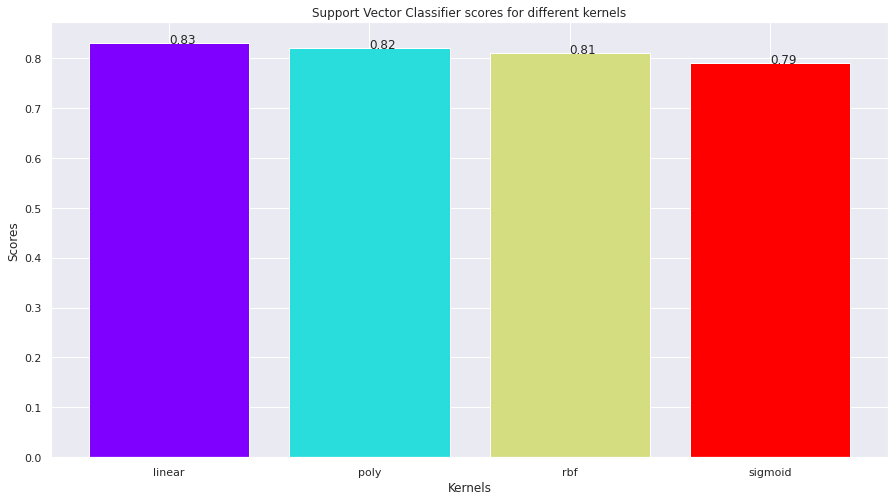

In [ ]:
from sklearn import svm
svc_scores = [] 
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 
for i in range(len(kernels)): 
  svc_classifier = svm.SVC(kernel = kernels[i]) 
  svc_classifier.fit(X_train, y_train)
  svc_scores.append(svc_classifier.score(X_test, y_test))
colors = rainbow(np.linspace(0, 1, len(kernels))) 
plt.bar(kernels, svc_scores, color = colors) 
for i in range(len(kernels)): 
  plt.text(i, svc_scores[i], svc_scores[i]) 
plt.xlabel('Kernels') 
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
svm_score = svc_scores[0]*100

In [36]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svm_score, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


**DECISION TREE**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = [] 
for i in range(1, len(X.columns) + 1): 
  dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0) 
  dt_classifier.fit(X_train, y_train) 
  dt_scores.append(dt_classifier.score(X_test, y_test))
#print(dt_scores)
dt_score = dt_scores[17]*100;

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

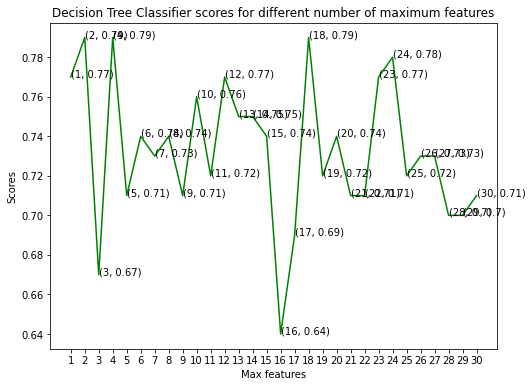

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
  plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [38]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_score, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


**Final Scores**

In [ ]:
scores = [score_lr,svm_score,knn_score,dt_score]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree"] 
#print(scores)
for i in range(len(algorithms)): 
  print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.0 %
The accuracy score achieved using Support Vector Machine is: 83.0 %
The accuracy score achieved using K-Nearest Neighbors is: 87.0 %
The accuracy score achieved using Decision Tree is: 79.0 %


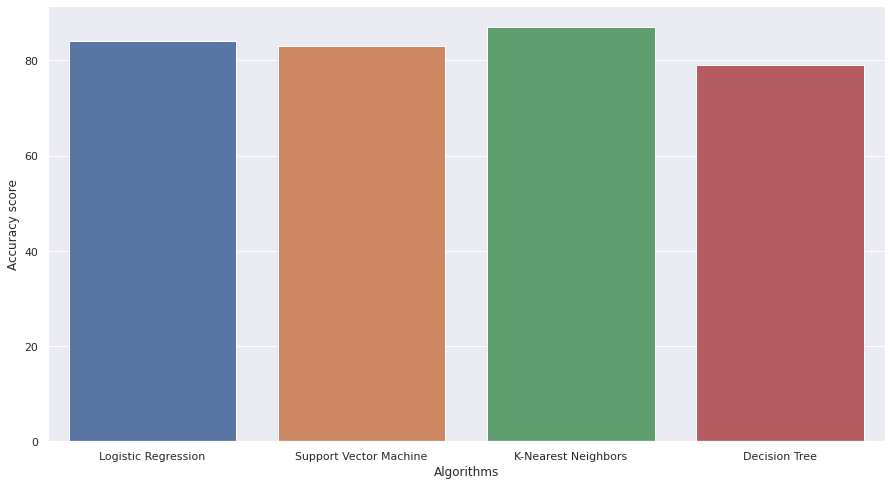

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)